In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [4]:
# Load dataset (assuming mm.csv contains meteorological data)
df = pd.read_csv('mm.csv')
df = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)']]  # Select features
df.dropna(inplace=True)



In [5]:
# Prepare data
X = df.drop('Temperature (C)', axis=1)
y = df['Temperature (C)']



In [6]:
# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)



In [7]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")



RMSE: 0.95


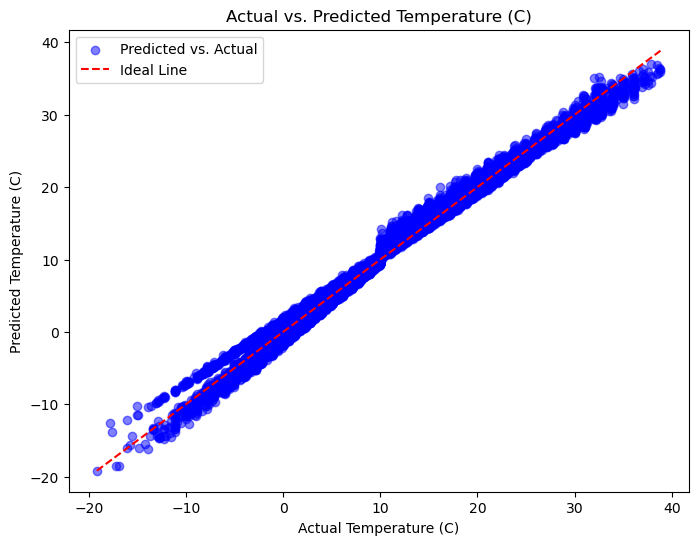


Feature Coefficients:
                    Feature  Coefficient
0  Apparent Temperature (C)     0.872360
1                  Humidity    -1.438081
2         Wind Speed (km/h)     0.079216
3           Visibility (km)     0.007748


In [8]:
# Visualization: Actual vs. Predicted Temperatures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.title('Actual vs. Predicted Temperature (C)')
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.legend()
plt.savefig('temperature_prediction.png')
plt.show()

# Optional: Feature importance (coefficients)
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': reg.coef_})
print("\nFeature Coefficients:")
print(coeff_df)